#Mining the Social Web, 2nd Edition

##Chapter 1: Mining Twitter: Exploring Trending Topics, Discovering What People Are Talking About, and More

This IPython Notebook provides an interactive way to follow along with and explore the numbered examples from [_Mining the Social Web (2nd Edition)_](http://bit.ly/135dHfs). The intent behind this notebook is to reinforce the concepts from the sample code in a fun, convenient, and effective way. This notebook assumes that you are reading along with the book and have the context of the discussion as you work through these exercises.

In the somewhat unlikely event that you've somehow stumbled across this notebook outside of its context on GitHub, [you can find the full source code repository here](http://bit.ly/16kGNyb).

## Copyright and Licensing

You are free to use or adapt this notebook for any purpose you'd like. However, please respect the [Simplified BSD License](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/LICENSE.txt) that governs its use.

# Twitter API Access

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://dev.twitter.com/apps and create a sample application. There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="files/resources/ch01-twitter/images/Twitter-AppCredentials.png" width="600px">

If you are taking advantage of the virtual machine experience for this chapter that is powered by Vagrant, you should just be able to execute the code in this notebook without any worries whatsoever about installing dependencies. If you are running the code from your own development envioronment, however, be advised that these examples in this chapter take advantage of a Python package called [twitter](https://github.com/sixohsix/twitter) to make API calls. You can install this package in a terminal with [pip](https://pypi.python.org/pypi/pip) with the command `pip install twitter`, preferably from within a [Python virtual environment](https://pypi.python.org/pypi/virtualenv). 

Once installed, you should be able to open up a Python interpreter (or better yet, your [IPython](http://ipython.org/) interpreter) and get rolling.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = '8J4ChDgB4TENiLeO2gXcmQGzK'
CONSUMER_SECRET ='wQBzpNpqgKzwk1gCItcJ30270dzJiAgQHv6n9QcF5f4KoodGgg'
OAUTH_TOKEN = '23399092-hPluWow97IVPNenB3ycbAbklvv8i9CyRfVvtnBjxz'
OAUTH_TOKEN_SECRET = 'EJ7GOsacvmZsDikgPzAaoSbw7SWYV1I4dzv2y5EcVzjil'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Example 1. Authorizing an application to access Twitter account data

## Example 2. Retrieving trends

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print(us_trends)

[{'trends': [{'name': '#canseliçinsusma', 'url': 'http://twitter.com/search?q=%23canseli%C3%A7insusma', 'tweet_volume': 264646, 'query': '%23canseli%C3%A7insusma', 'promoted_content': None}, {'name': '#SupportToHarry', 'url': 'http://twitter.com/search?q=%23SupportToHarry', 'tweet_volume': 159240, 'query': '%23SupportToHarry', 'promoted_content': None}, {'name': '#FashionVictims', 'url': 'http://twitter.com/search?q=%23FashionVictims', 'tweet_volume': 123001, 'query': '%23FashionVictims', 'promoted_content': None}, {'name': '#DBT7GHVIP', 'url': 'http://twitter.com/search?q=%23DBT7GHVIP', 'tweet_volume': 49251, 'query': '%23DBT7GHVIP', 'promoted_content': None}, {'name': 'Anthony Davis', 'url': 'http://twitter.com/search?q=%22Anthony+Davis%22', 'tweet_volume': 52569, 'query': '%22Anthony+Davis%22', 'promoted_content': None}, {'name': '#DAYTONA500', 'url': 'http://twitter.com/search?q=%23DAYTONA500', 'tweet_volume': 360909, 'query': '%23DAYTONA500', 'promoted_content': None}, {'name': 'F

## Example 3. Displaying API responses as pretty-printed JSON

In [6]:
import json

print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#canseli\u00e7insusma",
    "url": "http://twitter.com/search?q=%23canseli%C3%A7insusma",
    "tweet_volume": 264646,
    "query": "%23canseli%C3%A7insusma",
    "promoted_content": null
   },
   {
    "name": "#SupportToHarry",
    "url": "http://twitter.com/search?q=%23SupportToHarry",
    "tweet_volume": 159240,
    "query": "%23SupportToHarry",
    "promoted_content": null
   },
   {
    "name": "#FashionVictims",
    "url": "http://twitter.com/search?q=%23FashionVictims",
    "tweet_volume": 123001,
    "query": "%23FashionVictims",
    "promoted_content": null
   },
   {
    "name": "#DBT7GHVIP",
    "url": "http://twitter.com/search?q=%23DBT7GHVIP",
    "tweet_volume": 49251,
    "query": "%23DBT7GHVIP",
    "promoted_content": null
   },
   {
    "name": "Anthony Davis",
    "url": "http://twitter.com/search?q=%22Anthony+Davis%22",
    "tweet_volume": 52569,
    "query": "%22Anthony+Davis%22",
    "promoted_content": null
   },
   {
    "nam

## Example 4. Computing the intersection of two sets of trends

In [8]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#WWEFastlane', 'Anthony Davis', '#SupportToHarry', '#StadiumSeries', 'Dion Waiters', '#DAYTONA500', '#UFCPittsburgh', '#USAvCAN'}


## Example 5. Collecting search results

In [10]:
# Import unquote to prevent url encoding errors in next_results
#from urllib import unquote

from urllib.parse import unquote
# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#MentionSomeoneImportantForYou' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 1
{
 "metadata": {
  "result_type": "recent",
  "iso_language_code": "in"
 },
 "id_str": "700344257723265025",
 "in_reply_to_status_id": null,
 "geo": null,
 "truncated": false,
 "in_reply_to_screen_name": null,
 "contributors": null,
 "favorited": false,
 "entities": {
  "hashtags": [
   {
    "text": "MentionSomeoneImportantForYou",
    "indices": [
     52,
     82
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "name": "bie\uc8fc",
    "indices": [
     3,
     12
    ],
    "screen_name": "larvarhj",
    "id_str": "750178340",
    "id": 750178340
   }
  ],
  "urls": []
 },
 "retweet_count": 1,
 "in_reply_to_status_id_str": null,
 "retweeted_status": {
  "metadata": {
   "result_type": "recent",
   "iso_language_code": "in"
  },
  "id_str": "317107300835934209",
  "in_reply_to_status_id": null,
  "geo": null,
  "truncated": false,
  "in_reply_to_screen_name": null,
  "contributors": null,
  "favorited": false,
  "entities": {
   "hashtags": [
    {

Note: Should you desire to do so, you can load the same set of search results that are illustrated in the text of _Mining the Social Web_ by executing the code below that reads a snapshot of the data and stores it into the same statuses variable as was defined above. Alternatively, you can choose to skip execution of this cell in order to follow along with your own data.

In [11]:
import json
statuses = json.loads(open('resources/ch01-twitter/data/MentionSomeoneImportantForYou.json').read())

# The result of the list comprehension is a list with only one element that
# can be accessed by its index and set to the variable t
t = [ status 
      for status in statuses
          if status['id'] == 316948241264549888 ][0]

# Explore the variable t to get familiarized with the data structure...

print (t['retweet_count'])
print (t['retweeted_status'])

# Can you find the most retweeted tweet in your search results? Try do do it!

23
{'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'contributors': None, 'in_reply_to_status_id': None, 'favorite_count': 0, 'truncated': False, 'in_reply_to_screen_name': None, 'id_str': '316944833233186816', 'favorited': False, 'entities': {'hashtags': [{'text': 'MentionSomeoneImportantForYou', 'indices': [0, 30]}], 'user_mentions': [], 'urls': []}, 'retweet_count': 23, 'in_reply_to_status_id_str': None, 'created_at': 'Wed Mar 27 16:08:31 +0000 2013', 'retweeted': False, 'in_reply_to_user_id': None, 'coordinates': None, 'user': {'profile_text_color': '3C3940', 'notifications': None, 'url': 'http://t.co/yRX89YM4J0', 'profile_background_image_url_https': 'https://si0.twimg.com/profile_background_images/824774581/a0c35bcecb5642e0e17c707372fc393e.jpeg', 'profile_background_image_url': 'http://a0.twimg.com/profile_background_images/824774581/a0c35bcecb5642e0e17c707372fc393e.jpeg', 'profile_image_url_https': 'https://si0.twimg.com/profile_images/3429999131/c22f74b56d0e0b

## Example 6. Extracting text, screen names, and hashtags from tweets

In [12]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "\u201c@KathleenMariee_: #MentionSomeOneImportantForYou @AhhlicksCruise , @itsravennn_cx ,@kandykisses_13 , @BMOLOGY\u201d\ud83d\udc4d",
 "#MentionSomeoneImportantForYou My bf @Linkin_Sunrise.",
 "RT @hassanmusician: #MentionSomeoneImportantForYou God.",
 "#MentionSomeoneImportantForYou @Louis_Tomlinson",
 "#MentionSomeoneImportantForYou @Delta_Universe"
]
[
 "KathleenMariee_",
 "AhhlicksCruise",
 "itsravennn_cx",
 "kandykisses_13",
 "BMOLOGY"
]
[
 "MentionSomeOneImportantForYou",
 "MentionSomeoneImportantForYou",
 "MentionSomeoneImportantForYou",
 "MentionSomeoneImportantForYou",
 "MentionSomeoneImportantForYou"
]
[
 "\u201c@KathleenMariee_:",
 "#MentionSomeOneImportantForYou",
 "@AhhlicksCruise",
 ",",
 "@itsravennn_cx"
]


## Example 7. Creating a basic frequency distribution from the words in tweets

In [13]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10])

[('#MentionSomeoneImportantForYou', 92), ('RT', 34), ('my', 10), (',', 6), ('@justinbieber', 6), ('&lt;3', 6), ('My', 5), ('I', 4), ('and', 4), ('#mentionsomeoneimportantforyou', 3)]
[('justinbieber', 6), ('Cavillafuerte', 2), ('Kid_Charliej', 2), ('KittyFitzimors', 1), ('ummey_imnida', 1), ('hassanmusician', 1), ('luffy093', 1), ('heyitsadila', 1), ('ohohbree', 1), ('GR_78', 1)]
[('MentionSomeoneImportantForYou', 94), ('mentionsomeoneimportantforyou', 3), ('MyHeart', 1), ('NoHomo', 1), ('Love', 1), ('bebesito', 1), ('MentionSomeOneImportantForYou', 1)]


## Example 8. Using prettytable to display tuples in a nice tabular format

In [31]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:15] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------------------------------+-------+
| Word                           | Count |
+--------------------------------+-------+
| #MentionSomeoneImportantForYou |    92 |
| RT                             |    34 |
| my                             |    10 |
| ,                              |     6 |
| @justinbieber                  |     6 |
| &lt;3                          |     6 |
| My                             |     5 |
| I                              |     4 |
| and                            |     4 |
| #mentionsomeoneimportantforyou |     3 |
| love                           |     3 |
| te                             |     3 |
| me                             |     3 |
| just                           |     3 |
| con                            |     2 |
+--------------------------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| justinbieber   |     6 |
| Cavillafuerte  |     2 |
| Kid_Charliej   |     2 |
| KittyFitzimors |   

## Example 9. Calculating lexical diversity for tweets

In [16]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words))
print (lexical_diversity(screen_names))
print (lexical_diversity(hashtags))
print (average_words(status_texts))

0.6761061946902654
0.9554140127388535
0.06862745098039216
5.76530612245


## Example 10. Finding the most popular retweets

In [30]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 23    | hassanmusician | RT @hassanmusician: #MentionSomeoneImportantForYou |
|       |                | God.                                               |
| 21    | HSweethearts   | RT @HSweethearts: #MentionSomeoneImportantForYou   |
|       |                | my high school sweetheart ❤💋                       |
| 15    | LosAlejandro_  | RT @LosAlejandro_: ¿Nadie te menciono en           |
|       |                | "#MentionSomeoneImportantForYou"? JAJAJAJAJAJAJAJA |
|       |                | JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA Ven, ...  |
| 9     | SCOTTSUMME     | RT @SCOTTSUMME: #MentionSomeoneImportantForYou My  |
|       |                | Mum. Shes loving, caring, strong, all in one. I    |
|       |                | love her so m

## Example 11. Looking up users who have retweeted a status

In [32]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print ([r['user']['screen_name'] for r in _retweets])

['melissacaaag', 'jyeee', 'Ceejaynatics', 'Majendalove', 'ikaayyy_', 'RafaellaaaMae', 'LoveKyana18', 'iiaamcamillee', 'kidamgos', 'shangxshang', 'asdfghjbl', 'Papagars__']


## Example 12. Plotting frequencies of words

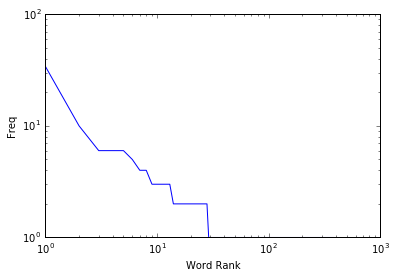

In [33]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Example 13. Generating histograms of words, screen names, and hashtags

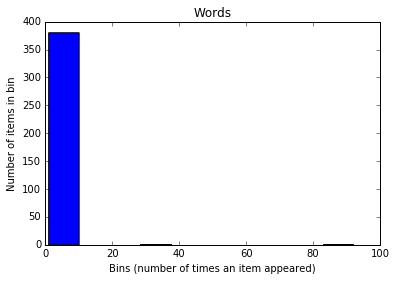

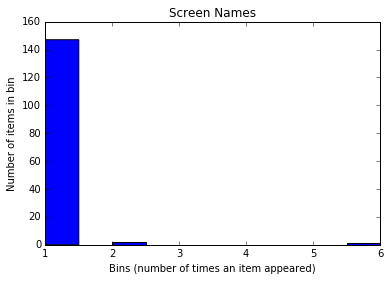

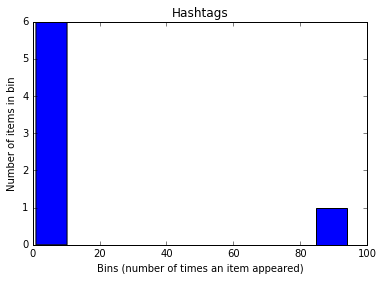

In [52]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    # plt.plot([1,2,3,4])
    # plt.ylabel('some numbers')
    # plt.show()
    
    c = Counter(data)
   
    #plt.plot([value for value in c.values()])
    plt.hist([value for value in c.values()])
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Example 14. Generating a histogram of retweet counts

[23, 1, 21, 1, 5, 2, 2, 2, 3, 1, 1, 1, 1, 9, 1, 1, 1, 15, 1, 1, 1, 2, 1, 1, 7, 6, 1, 3, 1, 1, 1, 1, 1]


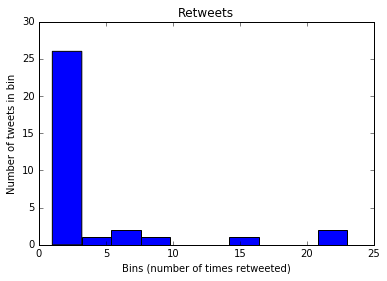

In [53]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print (counts)

Note: This histogram gives you an idea of how many times tweets are retweeted with the x-axis defining partitions for tweets that have been retweeted some number of times and the y-axis telling you how many tweets fell into each bin. For example, a y-axis value of 5 for the "15-20 bin" on the x-axis means that there were 5 tweets that were retweeted between 15 and 20 times.

Here's another variation that transforms the data using the (automatically imported from numpy) log function in order to improve the resolution of the plot.

[ 3.13549422  0.          3.04452244  0.          1.60943791  0.69314718
  0.69314718  0.69314718  1.09861229  0.          0.          0.          0.
  2.19722458  0.          0.          0.          2.7080502   0.          0.
  0.          0.69314718  0.          0.          1.94591015  1.79175947
  0.          1.09861229  0.          0.          0.          0.          0.        ]


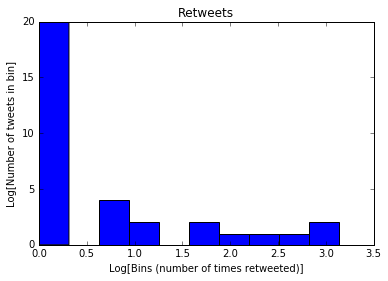

In [54]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.

plt.hist(log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

print(log(counts))